Based on: https://github.com/buomsoo-kim/Easy-deep-learning-with-Keras

# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

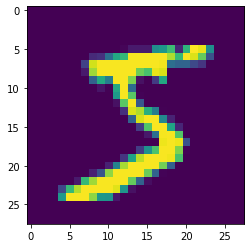

Label:  5


In [3]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

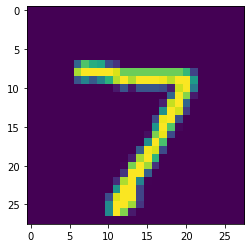

Label:  7


In [4]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [5]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [6]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [7]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and draws the confusion matrix.
    Normalization can be applied by setting normalize = True.
    """
    if not isinstance(y_pred[0], (np.int64, np.uint8)):
        _y_pred = np.eye(y_pred.shape[1])[y_pred.argmax(1)]
        _y_pred = [np.argmax(x) for x in _y_pred]
        _y_pred = np.rint(_y_pred)
        _y_pred = np.array([int(x) for x in _y_pred])
    else:
        _y_pred = y_pred.copy()
    if not isinstance(y_pred[0], (np.int64, np.uint8)):
        _y_true = [np.argmax(x) for x in y_true]
        _y_true = np.rint(_y_true)
        _y_true = np.array([int(x) for x in _y_true])
    else:
        _y_true = y_true.copy()
    
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without normalization.'

    cm = confusion_matrix(_y_true, _y_pred)
    classes = classes[unique_labels(_y_true, _y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization.')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Label',
           xlabel='Predicted Label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Basic MLP model
- Naive MLP model without any alterations

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [11]:
model = Sequential()

In [12]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
55/55 [==============================] - 0s 9ms/step - loss: 2.4289 - accuracy: 0.0875 - val_loss: 2.4191 - val_accuracy: 0.0921
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 2.4051 - accuracy: 0.0875 - val_loss: 2.3983 - val_accuracy: 0.0921
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3866 - accuracy: 0.0875 - val_loss: 2.3815 - val_accuracy: 0.0921
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3716 - accuracy: 0.0875 - val_loss: 2.3679 - val_accuracy: 0.0921
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3594 - accuracy: 0.0875 - val_loss: 2.3570 - val_accuracy: 0.0921
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3496 - accuracy: 0.0875 - val_loss: 2.3481 - val_accuracy: 0.0921
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 2.3416 - accuracy: 0.0875 - val_loss: 2.3409 - val_accuracy: 0.0921
Epoch 8/100
5

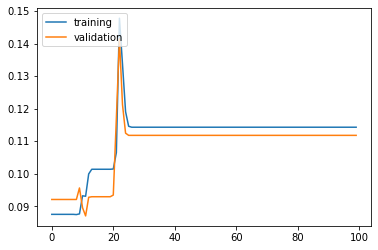

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [18]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.2997 - accuracy: 0.1135


In [19]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


Normalized Confusion Matrix
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


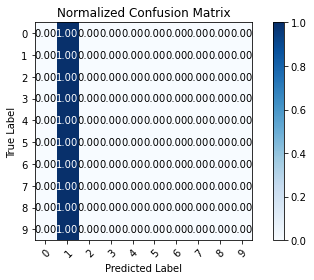

In [20]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [21]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 2.4546 - accuracy: 0.1143 - val_loss: 2.3962 - val_accuracy: 0.1118
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 2.3637 - accuracy: 0.1143 - val_loss: 2.3358 - val_accuracy: 0.1120
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 2.3219 - accuracy: 0.1143 - val_loss: 2.3100 - val_accuracy: 0.1121
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 2.3047 - accuracy: 0.1144 - val_loss: 2.3007 - val_accuracy: 0.1120
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2986 - accuracy: 0.1143 - val_loss: 2.2978 - val_accuracy: 0.1120
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 2.2963 - accuracy: 0.1143 - val_loss: 2.2965 - val_accuracy: 0.1118
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 2.2950 - accuracy: 0.1143 - val_loss: 2.2958 - val_accuracy: 0.1118

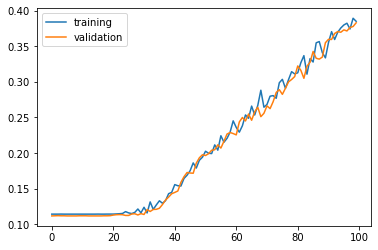

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [25]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.9991 - accuracy: 0.3827


In [26]:
print('Test accuracy: ', results[1])

Test accuracy:  0.38269999623298645


Normalized Confusion Matrix
[[6.18367347e-01 2.16326531e-01 3.06122449e-02 1.02040816e-03
  2.85714286e-02 0.00000000e+00 8.26530612e-02 2.24489796e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.93832599e-01 1.76211454e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.76211454e-03 2.64317181e-03
  0.00000000e+00 0.00000000e+00]
 [1.35658915e-02 3.70155039e-01 3.65310078e-01 1.93798450e-03
  1.35658915e-02 0.00000000e+00 1.60852713e-01 7.07364341e-02
  2.90697674e-03 9.68992248e-04]
 [1.68316832e-02 3.22772277e-01 1.05940594e-01 3.50495050e-01
  4.95049505e-03 0.00000000e+00 4.95049505e-02 1.49504950e-01
  0.00000000e+00 0.00000000e+00]
 [9.16496945e-03 3.66598778e-02 2.54582485e-02 0.00000000e+00
  6.21181263e-02 0.00000000e+00 2.03665988e-03 8.57433809e-01
  0.00000000e+00 7.12830957e-03]
 [2.46636771e-01 3.01569507e-01 5.82959641e-02 5.94170404e-02
  3.92376682e-02 0.00000000e+00 1.24439462e-01 1.70403587e-01
  0.00000000e+00 0.00000000e+00]
 [1.67014614e-02 6.51356994e-0

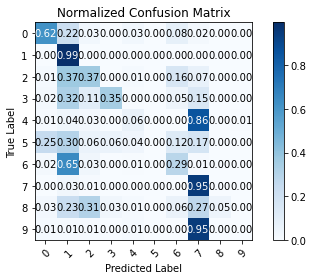

In [27]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>

In [28]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [29]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 2.0110 - accuracy: 0.5953 - val_loss: 0.8677 - val_accuracy: 0.7369
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 0.6794 - accuracy: 0.7986 - val_loss: 0.6026 - val_accuracy: 0.8170
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.8493 - val_loss: 0.5074 - val_accuracy: 0.8411
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8719 - val_loss: 0.6869 - val_accuracy: 0.8013
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8877 - val_loss: 0.4076 - val_accuracy: 0.8768
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.9009 - val_loss: 0.4033 - val_accuracy: 0.8800
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 0.2931 - accuracy: 0.9086 - val_loss: 0.3891 - val_accuracy: 0.8857

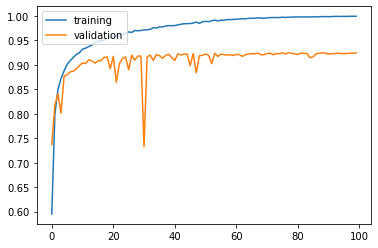

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [32]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.9272


In [33]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9272000193595886


Normalized Confusion Matrix
[[9.67346939e-01 0.00000000e+00 4.08163265e-03 2.04081633e-03
  1.02040816e-03 6.12244898e-03 1.12244898e-02 1.02040816e-03
  4.08163265e-03 3.06122449e-03]
 [8.81057269e-04 9.81497797e-01 3.52422907e-03 1.76211454e-03
  8.81057269e-04 2.64317181e-03 1.76211454e-03 8.81057269e-04
  6.16740088e-03 0.00000000e+00]
 [9.68992248e-03 5.81395349e-03 9.16666667e-01 2.13178295e-02
  2.90697674e-03 7.75193798e-03 7.75193798e-03 8.72093023e-03
  1.55038760e-02 3.87596899e-03]
 [3.96039604e-03 9.90099010e-04 1.48514851e-02 9.15841584e-01
  0.00000000e+00 2.67326733e-02 0.00000000e+00 9.90099010e-03
  2.17821782e-02 5.94059406e-03]
 [2.03665988e-03 1.01832994e-03 7.12830957e-03 0.00000000e+00
  9.18533605e-01 2.03665988e-03 1.01832994e-02 6.10997963e-03
  4.07331976e-03 4.88798371e-02]
 [1.34529148e-02 1.12107623e-03 7.84753363e-03 4.48430493e-02
  5.60538117e-03 8.82286996e-01 8.96860987e-03 4.48430493e-03
  2.35426009e-02 7.84753363e-03]
 [1.46137787e-02 2.08768267e-0

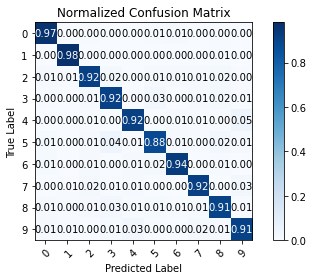

In [34]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [35]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 1.9451 - accuracy: 0.3699 - val_loss: 1.2722 - val_accuracy: 0.6564
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 0.9927 - accuracy: 0.6971 - val_loss: 0.8881 - val_accuracy: 0.6953
Epoch 3/100
434/434 [==============================] - 1s 3ms/step - loss: 0.7985 - accuracy: 0.7390 - val_loss: 0.7749 - val_accuracy: 0.7396
Epoch 4/100
434/434 [==============================] - 1s 3ms/step - loss: 0.7144 - accuracy: 0.7749 - val_loss: 0.6728 - val_accuracy: 0.7953
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 0.6378 - accuracy: 0.8063 - val_loss: 0.6361 - val_accuracy: 0.8051
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 0.5941 - accuracy: 0.8181 - val_loss: 0.6600 - val_accuracy: 0.7749
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 0.5871 - accuracy: 0.8126 - val_loss: 0.5563 - val_accuracy: 0.8247

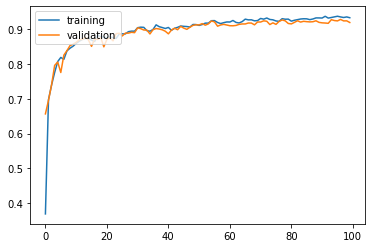

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [39]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9173


In [40]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9172999858856201


Normalized Confusion Matrix
[[9.68367347e-01 0.00000000e+00 1.02040816e-03 3.06122449e-03
  0.00000000e+00 9.18367347e-03 1.02040816e-02 4.08163265e-03
  3.06122449e-03 1.02040816e-03]
 [0.00000000e+00 9.77092511e-01 1.76211454e-03 5.28634361e-03
  1.76211454e-03 0.00000000e+00 5.28634361e-03 0.00000000e+00
  7.92951542e-03 8.81057269e-04]
 [1.16279070e-02 6.78294574e-03 9.08914729e-01 2.90697674e-02
  4.84496124e-03 2.90697674e-03 1.16279070e-02 7.75193798e-03
  1.55038760e-02 9.68992248e-04]
 [2.97029703e-03 9.90099010e-04 1.78217822e-02 9.09900990e-01
  0.00000000e+00 2.77227723e-02 9.90099010e-04 1.28712871e-02
  2.27722772e-02 3.96039604e-03]
 [3.05498982e-03 3.05498982e-03 6.10997963e-03 0.00000000e+00
  9.32790224e-01 3.05498982e-03 8.14663951e-03 3.05498982e-03
  7.12830957e-03 3.36048880e-02]
 [1.56950673e-02 2.24215247e-03 4.48430493e-03 4.70852018e-02
  8.96860987e-03 8.72197309e-01 1.56950673e-02 6.72645740e-03
  2.01793722e-02 6.72645740e-03]
 [1.56576200e-02 3.13152401e-0

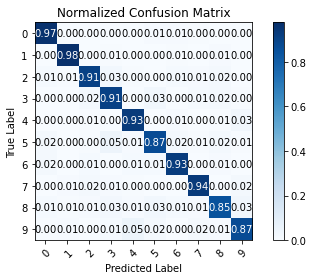

In [41]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [46]:
from tensorflow.keras.layers import BatchNormalization

In [47]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [48]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 2s 4ms/step - loss: 2.2577 - accuracy: 0.2309 - val_loss: 2.1423 - val_accuracy: 0.3283
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 2.0092 - accuracy: 0.4118 - val_loss: 1.9131 - val_accuracy: 0.4936
Epoch 3/100
434/434 [==============================] - 2s 4ms/step - loss: 1.8629 - accuracy: 0.5313 - val_loss: 1.7874 - val_accuracy: 0.5751
Epoch 4/100
434/434 [==============================] - 1s 3ms/step - loss: 1.7558 - accuracy: 0.6006 - val_loss: 1.6936 - val_accuracy: 0.6354
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 1.6728 - accuracy: 0.6499 - val_loss: 1.6170 - val_accuracy: 0.6753
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 1.6026 - accuracy: 0.6830 - val_loss: 1.5533 - val_accuracy: 0.7066
Epoch 7/100
434/434 [==============================] - 2s 4ms/step - loss: 1.5452 - accuracy: 0.7104 - val_loss: 1.4961 - val_accuracy: 0.7273

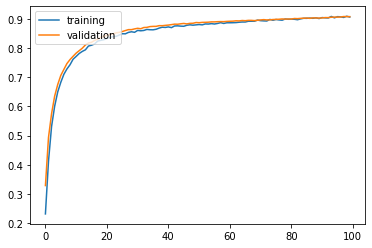

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [50]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.9112


In [51]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9111999869346619


Normalized Confusion Matrix
[[9.73469388e-01 0.00000000e+00 3.06122449e-03 1.02040816e-03
  1.02040816e-03 8.16326531e-03 8.16326531e-03 1.02040816e-03
  3.06122449e-03 1.02040816e-03]
 [0.00000000e+00 9.81497797e-01 2.64317181e-03 2.64317181e-03
  8.81057269e-04 1.76211454e-03 2.64317181e-03 1.76211454e-03
  6.16740088e-03 0.00000000e+00]
 [1.06589147e-02 6.78294574e-03 8.86627907e-01 1.25968992e-02
  1.45348837e-02 9.68992248e-04 1.35658915e-02 1.64728682e-02
  3.68217054e-02 9.68992248e-04]
 [1.98019802e-03 2.97029703e-03 2.27722772e-02 9.00000000e-01
  2.97029703e-03 2.07920792e-02 2.97029703e-03 1.78217822e-02
  2.27722772e-02 4.95049505e-03]
 [0.00000000e+00 3.05498982e-03 4.07331976e-03 0.00000000e+00
  9.33808554e-01 1.01832994e-03 1.32382892e-02 2.03665988e-03
  5.09164969e-03 3.76782077e-02]
 [1.68161435e-02 1.12107623e-03 6.72645740e-03 4.48430493e-02
  1.23318386e-02 8.37443946e-01 2.13004484e-02 1.34529148e-02
  3.69955157e-02 8.96860987e-03]
 [9.39457203e-03 5.21920668e-0

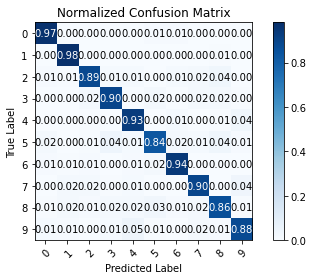

In [52]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [53]:
from tensorflow.keras.layers import Dropout

In [54]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [55]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 1s 3ms/step - loss: 2.5138 - accuracy: 0.1040 - val_loss: 2.4026 - val_accuracy: 0.0929
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 2.4075 - accuracy: 0.1023 - val_loss: 2.3374 - val_accuracy: 0.1237
Epoch 3/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3678 - accuracy: 0.1062 - val_loss: 2.3129 - val_accuracy: 0.1118
Epoch 4/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3579 - accuracy: 0.1001 - val_loss: 2.3046 - val_accuracy: 0.1118
Epoch 5/100
434/434 [==============================] - 2s 4ms/step - loss: 2.3507 - accuracy: 0.1046 - val_loss: 2.3019 - val_accuracy: 0.1118
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3501 - accuracy: 0.1018 - val_loss: 2.3008 - val_accuracy: 0.1118
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 2.3472 - accuracy: 0.1046 - val_loss: 2.3002 - val_accuracy: 0.1118

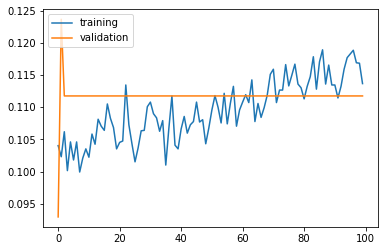

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [57]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2844 - accuracy: 0.1135


In [58]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


Normalized Confusion Matrix
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


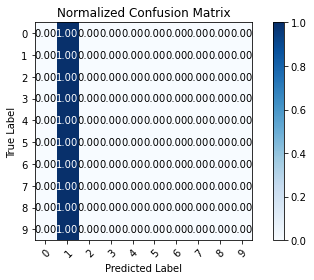

In [59]:
plot_confusion_matrix(y_true=y_test, y_pred=model.predict(X_test), classes=np.array(range(10)), normalize=True)

## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [60]:
import numpy as np

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [61]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [62]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [66]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model1._estimator_type = "classifier"
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2._estimator_type = "classifier"
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3._estimator_type = "classifier"

In [67]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [68]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FDB860250>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FDB8602B0>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FDB8602E0>)],
                 voting='soft')

In [69]:
y_pred = ensemble_clf.predict(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [70]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.276


Normalized Confusion Matrix
[[8.00000000e-01 1.98979592e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.02040816e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.78294574e-03 9.91279070e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.93798450e-03
  0.00000000e+00 0.00000000e+00]
 [9.90099010e-03 9.89108911e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.90099010e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.27291242e-01 0.00000000e+00 0.00000000e+00
  1.01832994e-03 0.00000000e+00 2.03665988e-03 3.69653768e-01
  0.00000000e+00 0.00000000e+00]
 [9.64125561e-02 8.99103139e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.48430493e-03
  0.00000000e+00 0.00000000e+00]
 [1.35699374e-02 7.66179541e-0

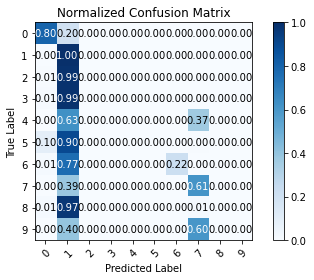

In [71]:
plot_confusion_matrix(y_true=y_test, y_pred=ensemble_clf.predict(X_test), classes=np.array(range(10)), normalize=True)

Slight boost in the test accuracy from the outset **(0.2144 => 0.3045)**

## Summary

|Model           | Naive Model | He normal  | Relu        | Adam        | Batchnorm  | Dropout   | Ensemble   |
|----------------|-------------|------------|-------------|-------------|------------|-----------|------------|
|Test Accuracy   | 0.2144      | 0.4105     | 0.9208      | 0.9248      | 0.9154     | 0.1135    | 0.3045     |

<br>
It turns out that most methods improve the model training & test performance.
Why don't try them out altogether?

# Putting it altogether

In [74]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

## Load Dataset

In [75]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [76]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [77]:
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Training & Validating Model
- Measures to improve training is applied simultaneously
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [78]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [85]:
# create 5 models to ensemble
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model1._estimator_type = "classifier"
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2._estimator_type = "classifier"
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3._estimator_type = "classifier"
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4._estimator_type = "classifier"
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5._estimator_type = "classifier"

In [86]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')

In [87]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7718 - accuracy: 0.7637
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4351 - accuracy: 0.8747
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3609 - accuracy: 0.8984
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3160 - accuracy: 0.9107
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.9173
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2726 - accuracy: 0.9219
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2638 - accuracy: 0.9257
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9285
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2505 - accuracy: 0.9288
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FD4FDAC70>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FD4FDA6A0>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FD4FDAB20>),
                             ('model4',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FD4FDA5B0>),
                             ('model5',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013FD4FDABB0>)],
                 voting='soft')

In [88]:
y_pred = ensemble_clf.predict(X_test)

In [89]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.98


Normalized Confusion Matrix
[[9.91836735e-01 1.02040816e-03 2.04081633e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.04081633e-03 1.02040816e-03
  2.04081633e-03 0.00000000e+00]
 [0.00000000e+00 9.91189427e-01 2.64317181e-03 8.81057269e-04
  0.00000000e+00 0.00000000e+00 1.76211454e-03 8.81057269e-04
  2.64317181e-03 0.00000000e+00]
 [1.93798450e-03 0.00000000e+00 9.82558140e-01 1.93798450e-03
  1.93798450e-03 0.00000000e+00 0.00000000e+00 7.75193798e-03
  3.87596899e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.97029703e-03 9.85148515e-01
  0.00000000e+00 2.97029703e-03 0.00000000e+00 5.94059406e-03
  2.97029703e-03 0.00000000e+00]
 [1.01832994e-03 0.00000000e+00 3.05498982e-03 0.00000000e+00
  9.76578411e-01 0.00000000e+00 5.09164969e-03 3.05498982e-03
  2.03665988e-03 9.16496945e-03]
 [2.24215247e-03 0.00000000e+00 0.00000000e+00 7.84753363e-03
  0.00000000e+00 9.76457399e-01 5.60538117e-03 2.24215247e-03
  3.36322870e-03 2.24215247e-03]
 [5.21920668e-03 3.13152401e-0

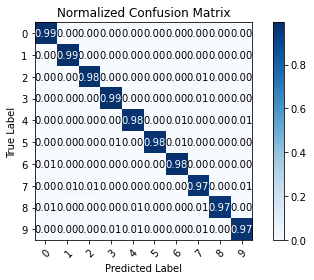

In [90]:
plot_confusion_matrix(y_true=y_test, y_pred=ensemble_clf.predict(X_test), classes=np.array(range(10)), normalize=True)

Final model produces over **98% of accuracy**, which is rather improved from before